In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
## Load MNIST Data (train.csv)
d0 = pd.read_csv("/content/train (2).csv")


In [6]:
d0.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
d0.shape

(42000, 785)

In [8]:
l = d0['label']

In [9]:
d = d0.drop(['label'], axis=1)

In [10]:
print(l.shape)
print(d.shape)

(42000,)
(42000, 784)


In [11]:
label_value = d0.iloc[1, 0]
print(label_value)

0


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `data` is your 1D array representing pixel values
# For example:
data = d.iloc[1].values  # Replace with your actual data array of size 784




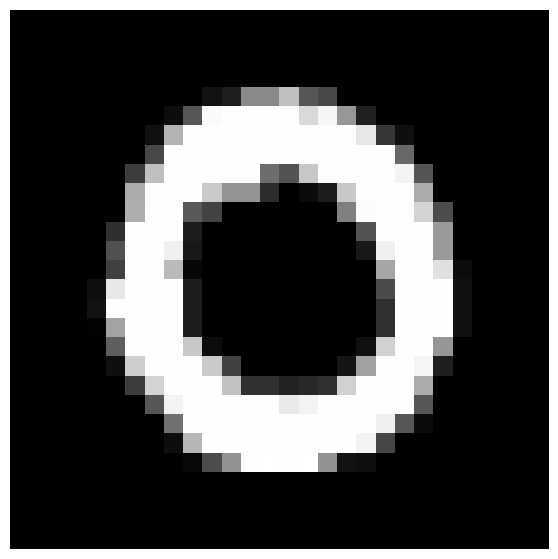

In [15]:
# Reshape the data from 1D (784,) to 2D (28,28) pixel array
grid_data = data.reshape(28, 28)

# Create the plot
plt.figure(figsize=(7, 7))
plt.imshow(grid_data, cmap='gray', interpolation='none')
plt.axis('off')  # Hide axis for a cleaner look
plt.show()

# 2D visualization using PCA

In [16]:
labels = l.iloc[:15000]
data = d.iloc[:15000]


In [17]:
data.shape

(15000, 784)

## Data Preprocessing: Standardizing the Data

In [18]:
from sklearn.preprocessing import StandardScaler

# Assuming `data` is your DataFrame or numpy array with the features to be standardized
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data)

standardized_data.shape


(15000, 784)

## Co-variance Matrix

In [20]:
import numpy as np

# Assuming `sample_data` is your data matrix with shape (n_samples, n_features)
# Center the data by subtracting the mean of each feature
sample_data = data - np.mean(data, axis=0)

# Compute the covariance matrix using matrix multiplication
covar_matrix = np.dot(sample_data.T, sample_data) / (sample_data.shape[0] - 1)

# Print the shape of the covariance matrix
print("Shape of covar_matrix:", covar_matrix.shape)


Shape of covar_matrix: (784, 784)


## Eigen Values and Eigen Vectors

# PCA using Scikit-Learn

In [22]:
from sklearn.decomposition import PCA

# Initializing PCA for 2 principal components
pca = PCA(n_components=2)

In [23]:
pca_data = pca.fit_transform(data)

# pca_data now contains the 2D projections of sample_data
print("Shape of pca_data:", pca_data.shape)

Shape of pca_data: (15000, 2)


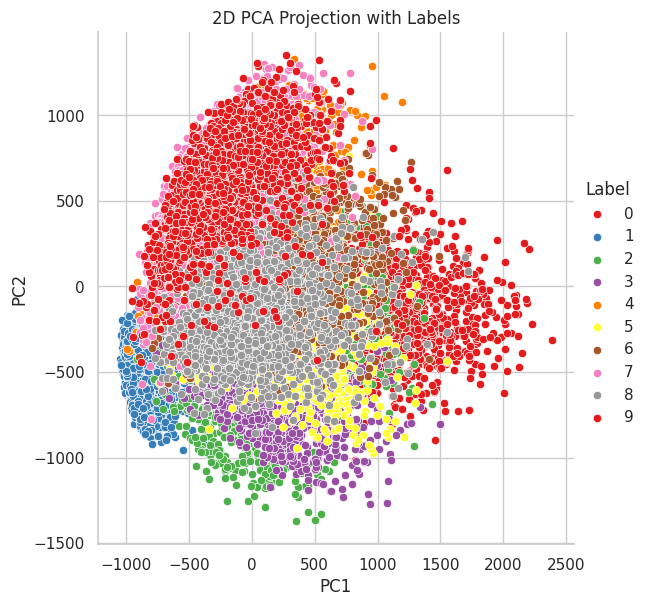

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stack the labels with the pca_data
pca_data_with_labels = np.vstack((pca_data.T, labels)).T

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=pca_data_with_labels, columns=["PC1", "PC2", "Label"])

# Convert 'Label' column to categorical if needed
pca_df["Label"] = pca_df["Label"].astype(int)  # Ensure labels are integers, if necessary

# Plot using seaborn's FacetGrid for a scatter plot
sns.set(style="whitegrid")
g = sns.FacetGrid(pca_df, hue="Label", height=6, palette="Set1")
g.map_dataframe(sns.scatterplot, x="PC1", y="PC2")
g.add_legend()

plt.title("2D PCA Projection with Labels")
plt.show()

# PCA for dimensionality reduction

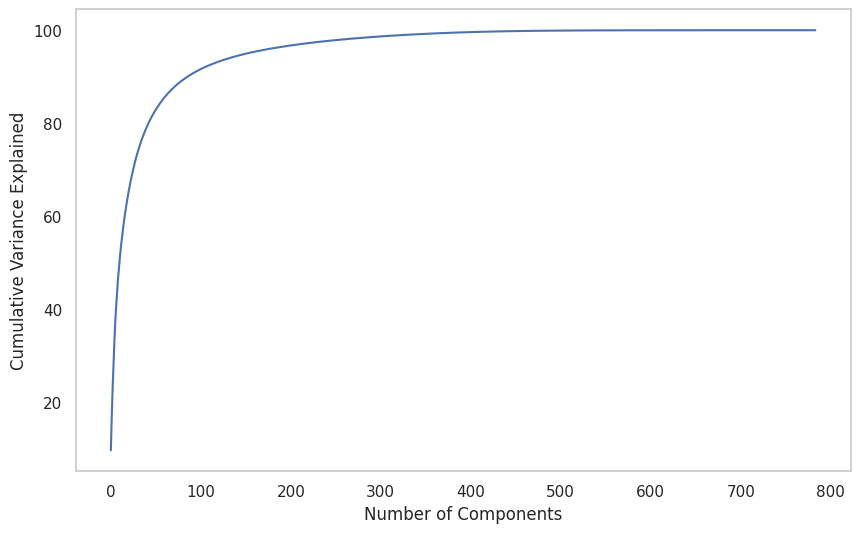

In [30]:
# Assuming `sample_data` is your data matrix
pca = PCA(n_components=784)

# Fit and transform the sample data
pca_data = pca.fit_transform(data)

# Calculate the percentage of variance explained by each component
percentage_var_explained = pca.explained_variance_ratio_ * 100

# Calculate the cumulative sum of the explained variance percentages
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(figsize=(10, 6))
plt.plot(cum_var_explained, color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()